In [1]:
import numpy as np
import pandas as pd

In [2]:

x_eval = np.load('x_eval.npy')
y_eval = np.load('y_eval.npy')


In [5]:
x_eval.shape
y_eval.shape

(126256,)

In [15]:

y_eval = y_eval.astype(float)

In [18]:
np.max(y_eval)

319.98

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


y_norm = scaler.fit_transform(y_eval.reshape(-1, 1))


In [21]:
y_norm

array([[0.50038283],
       [0.49953904],
       [0.50044533],
       ...,
       [0.59790303],
       [0.38400238],
       [0.38400238]])

In [24]:
x_eval.shape

(126256, 64)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adagrad # for epsilon but i guess sgd can be used too
from tensorflow.keras.losses import mean_squared_error


input_shape = (64,)
output_shape = (1,)
num_hidden_layers = 3
num_hidden_units = 2048
activation = 'elu'
learning_rate = 0.001
epsilon = 1e-8
momentum = 0.7


model = Sequential()
model.add(Dense(num_hidden_units, input_shape=input_shape, activation=activation))
model.add(BatchNormalization())

for i in range(num_hidden_layers-1):
    model.add(Dense(num_hidden_units, activation=activation))
    model.add(BatchNormalization())

model.add(Dense(output_shape[0]))


optimizer = Adagrad(learning_rate=learning_rate, epsilon=epsilon)
model.compile(optimizer=optimizer, loss=mean_squared_error, metrics=['accuracy'])


# loss function mean average error

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2048)              133120    
                                                                 
 batch_normalization_9 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 2048)              4196352   
                                                                 
 batch_normalization_10 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 2048)              4196352   
                                                                 
 batch_normalization_11 (Bat  (None, 2048)            

In [ ]:
from sklearn.model_selection import train_test_split

# # Split the data into train and test sets
x_train, x_test, y_train_norm, y_test_norm = train_test_split(x_eval, y_norm, test_size=0.2, random_state=42)
history = model.fit(x_train, y_train_norm, epochs=5, batch_size=32, validation_data=(x_test, y_test_norm))


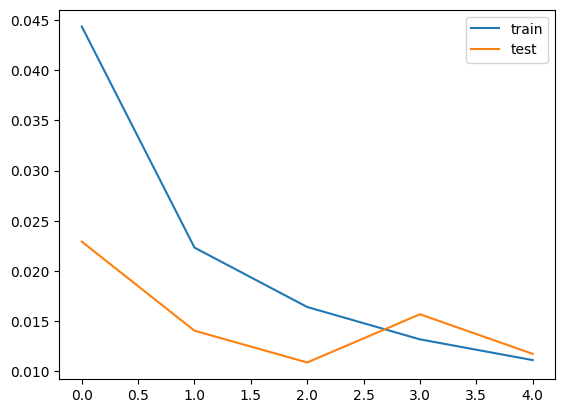

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [45]:
# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test_norm, verbose=0)
print('Test loss:', test_loss)

Test loss: 0.01173939649015665


In [37]:
print(y_pred)

[[-17.622908 ]
 [ 66.78771  ]
 [-72.51498  ]
 ...
 [ -6.1629486]
 [ 26.436365 ]
 [ 19.559702 ]]


In [39]:
#save the model
model.save('custom_games_regression_model.h5')

In [44]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
# from tensorflow.keras.optimizers import Adagrad # for epsilon but i guess sgd can be used too
# from tensorflow.keras.losses import mean_absolute_error


# input_shape = (64,)
# output_shape = (1,)
# num_hidden_layers = 3
# num_hidden_units = 2048
# activation = 'elu'
# learning_rate = 0.001
# epsilon = 1e-8
# momentum = 0.7


# model = Sequential()
# model.add(Dense(num_hidden_units, input_shape=input_shape, activation=activation))
# model.add(BatchNormalization())

# for i in range(num_hidden_layers-1):
#     model.add(Dense(num_hidden_units, activation=activation))
#     model.add(BatchNormalization())

# model.add(Dense(output_shape[0]))


# optimizer = Adagrad(learning_rate=learning_rate, epsilon=epsilon)
# model.compile(optimizer=optimizer, loss=mean_absolute_error, metrics=['mean_absolute_error'])


# # loss function mean average error

# model.summary()


In [42]:
# train the model
# history = model.fit(x_train, y_train_norm, epochs=1, batch_size=32, validation_data=(x_test, y_test_norm))

In [43]:
# #Load model
# from tensorflow.keras.models import load_model
# model = load_model('custom_games_regression_model.h5')